<a href="https://colab.research.google.com/github/Saipraneeth99/DeepLearning/blob/main/1-2.3ZeroGradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Non Linear Functions

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
# Generate training data
def function1():
  x = np.linspace(-2 * np.pi, 2 * np.pi, 2000)
  y = np.sin(np.pi * x)
  return x,y



Converting into Pytorch Tensor


In [6]:
# Convert to PyTorch tensors
def convertToTensors(x,y):
  x_tensor = torch.from_numpy(x).float().unsqueeze(1)
  y_tensor = torch.from_numpy(y).float().unsqueeze(1)
  return x_tensor,y_tensor

In [7]:

# DNN Model2
class DNN2(torch.nn.Module):
    def __init__(self):
        super(DNN2, self).__init__()
        self.fc1 = torch.nn.Linear(1, 64)
        self.fc2 = torch.nn.Linear(64, 64)
        self.fc3 = torch.nn.Linear(64, 64)
        self.fc4 = torch.nn.Linear(64, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model2 = DNN2()

total_params2 = sum(p.numel() for p in model2.parameters())
print("Number of parameters in the above DNN model : ", total_params2)



Number of parameters in the above DNN model :  8513


In [26]:
summary(model2,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             128
              ReLU-2                   [-1, 64]               0
            Linear-3                   [-1, 64]           4,160
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 64]           4,160
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 1]              65
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [1]:
# # DNN Model3
# class DNN3(torch.nn.Module):
#     def __init__(self):
#         super(DNN3, self).__init__()
#         self.fc1 = torch.nn.Linear(1, 32)
#         self.fc2 = torch.nn.Linear(32, 32)
#         self.fc3 = torch.nn.Linear(32, 32)
#         self.fc4 = torch.nn.Linear(32, 32)
#         self.fc5 = torch.nn.Linear(32, 32)
#         self.fc6 = torch.nn.Linear(32, 32)
#         self.fc7 = torch.nn.Linear(32, 64)
#         self.fc8 = torch.nn.Linear(64, 16)
#         self.fc9 = torch.nn.Linear(16, 1)
#         self.relu = torch.nn.ReLU()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.relu(self.fc3(x))
#         x = self.relu(self.fc4(x))
#         x = self.relu(self.fc5(x))
#         x = self.relu(self.fc6(x))
#         x = self.relu(self.fc7(x))
#         x = self.relu(self.fc8(x))
#         x = self.fc9(x)
#         return x


# model3 = DNN3()
# total_params3 = sum(p.numel() for p in model3.parameters())
# print("Number of parameters in the above DNN model : ", total_params3)



In [2]:
# summary(model3,(1,))

Loss Function, Training the model

Loss Function and Training the model



In [22]:
x2,y2 = function1()
x_tensor2,y_tensor2 = convertToTensors(x2,y2)

# Define the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

# Train the model
losses2 = []
minimal_ratios = []
for epoch in range(100):
    # Forward pass
    y_pred2 = model2(x_tensor2)
    loss = criterion(y_pred2, y_tensor2)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
    # Save the loss for plotting
    losses2.append(loss.item())
    with torch.no_grad():
        minimal_ratio = float("inf")

        for name, param in model2.named_parameters():
            if not param.requires_grad:
                continue

            param_grad = param.grad.reshape(-1)

            hessian_matrix = torch.zeros((param_grad.shape[0], param_grad.shape[0]))
            for index, grad_index in enumerate(param_grad):
                grad_index.requires_grad_()
                grad_output = torch.autograd.grad(grad_index, param, retain_graph=True, create_graph=True,allow_unused=True)[0]

                if(grad_output is not None):
                    hessian_matrix[index] = grad_output.reshape(-1)

            eigen_values, _ = torch.linalg.eig(hessian_matrix) # Returns the eigen values for the hessian matrix
            eigen_values = eigen_values.abs()
            
            minimal_ratio = min(minimal_ratio, param.abs().min().item() / (eigen_values.max().item() + 1e-7)) # To find the minimal ratio

        minimal_ratios.append(minimal_ratio)
        # losses2.append(loss.item())
        if (epoch + 1) % 10 == 0:
          print(epoch)
    # # Print progress
    # if (epoch + 1) % 1000 == 0:
    #     print(loss.item())
    #     print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 10000, loss.item()))

9
19
29
39
49
59
69
79
89
99


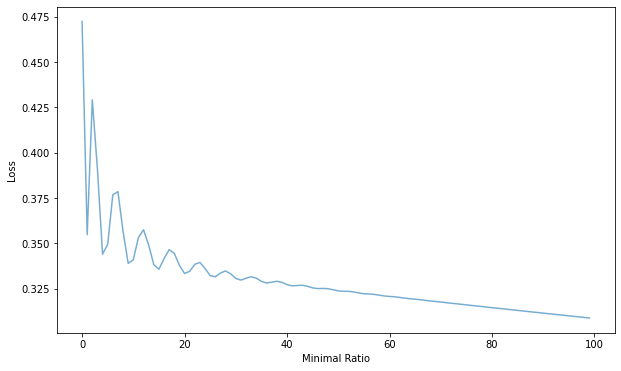

In [23]:
plt_1 = plt.figure(figsize=(10, 6))
plt.plot(losses2,alpha=0.6)
plt.xlabel('Minimal Ratio')
plt.ylabel('Loss')
plt.show()

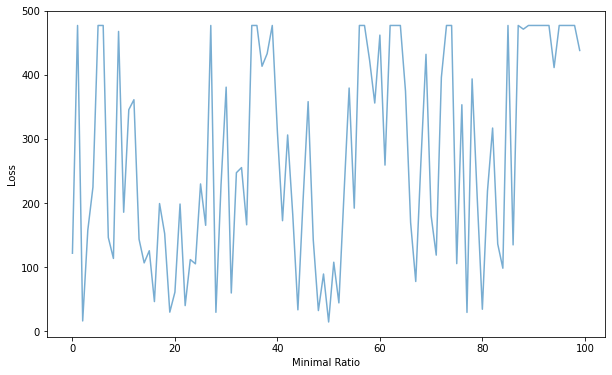

In [24]:
plt_1 = plt.figure(figsize=(10, 6))
plt.plot(minimal_ratios,alpha=0.6)
plt.xlabel('Minimal Ratio')
plt.ylabel('Loss')
plt.show()

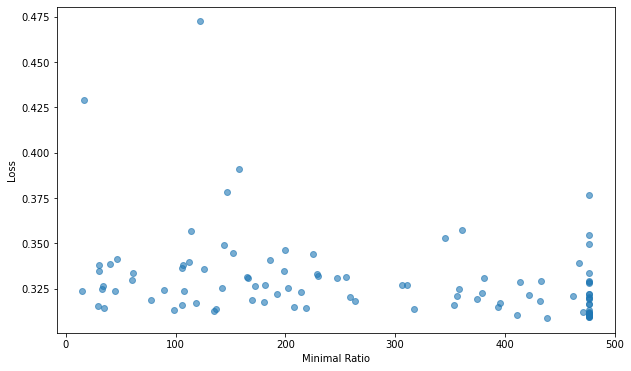

In [25]:
plt_1 = plt.figure(figsize=(10, 6))
plt.scatter(minimal_ratios,losses2,alpha=0.6)
plt.xlabel('Minimal Ratio')
plt.ylabel('Loss')
plt.show()